## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Изучите общую информацию. 

In [ ]:
import pandas as pd
from pymystem3 import Mystem
from collections import Counter

In [2]:
df = pd.read_csv('/content/data (1).csv')
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [ ]:
df.duplicated().sum()

54

### Вывод

База изучена, проверена на пропуски, дубликаты и готова к дальнейшей предобработке. Также принято решение не вносить правки в столбцы, которые не понадобятся для ответа на основные вопросы: days_employed, education_id, family_status_id, gender, income_type.

### Шаг 2. Предобработка данных

### Замена регистра

In [ ]:
df['education'] = df['education'].str.lower()

### Вывод

<font color='green'>Заменил регистр в столбце Education, что привело к росту количества дубликатов на 25%. </font>

### Замена ошибок

In [ ]:
def children (df):
    if df['children'] == 20:
        return 2
    elif df['children'] == -1:
        return 1
    else:
        return df['children']

In [ ]:
df['children'] = df.apply(children, axis=1)

### Вывод

<font color='green'>Решил, что значения 20 и -1 - это ошибки при вводе данных в столбце children, поэтому принял решение заменить их на 2 и 1 соответственно. </font>

### Обработка пропусков

In [ ]:
df['total_income'].min()

20667.26379327158

In [ ]:
df['total_income'].max()

2265604.028722744

In [ ]:
df.groupby('education')['total_income'].agg(['mean','median'])

,mean,median
education,,
высшее,207142.515219,175340.818855
начальное,132155.513626,117137.352825
неоконченное высшее,181534.022774,160115.398644
среднее,153715.643971,136478.643244
ученая степень,174750.155792,157259.898555


In [ ]:
df.groupby('income_type')['total_income'].agg(['mean','median'])

,mean,median
income_type,,
безработный,131339.751676,131339.751676
в декрете,53829.130729,53829.130729
госслужащий,170898.309923,150447.935283
компаньон,202417.461462,172357.950966
пенсионер,137127.465690,118514.486412
предприниматель,499163.144947,499163.144947
сотрудник,161380.260488,142594.396847
студент,98201.625314,98201.625314


In [ ]:
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('mean'))

### Вывод


<font color='green'>На данном этапе заменяем все NaN в столбце Total_Income на среднее значение в рамках категории income_type, так как там прослеживается наибольший разрыв в доходах.</font> Столбец Days_Employed - игнорируем, так как он не понадобится в дальнейшем.

Так как все пропуски находятся в двух стобцах Total_Income и Days_Employed, и при этом если есть пропуск в Days_Employed, то он есть и в Total_Income (и наоборот), то можно предположить, что проблема крайне проста: когда клиент оставлял заявку на кредит, у него не было возможности предоставить трудовую книжку + справку о доходах с работы.

### Замена типа данных

In [ ]:
df['total_income'] = df['total_income'].astype(int)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


### Вывод

Заменил float на int значения для более комфортной и корректной обработки значений на следующих этапах. Использовал .astype, так как он отлично подходит для перевода значений столбца в тип данных int.

### Обработка дубликатов

In [ ]:
df.drop_duplicates().reset_index(drop
= True)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем
21450,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем
21451,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21452,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля


### Вывод

Так как дубликатов оказалось менее 1% от общего количества - то можно безболезненно от них избавиться. Обнаружить причину появления дубликатов - не удалось. Столь малый процент дубликатов можно смело списать на техническую ошибку.

### Лемматизация

In [ ]:
from pymystem3 import Mystem
m = Mystem() 

df['lemmas'] = df.purpose.apply(m.lemmatize)

from collections import Counter
Counter(m.lemmatize(' '.join(df['purpose'])))

Counter({'покупка': 5912,
         ' ': 55201,
         'жилье': 4473,
         'приобретение': 462,
         'автомобиль': 4315,
         'дополнительный': 909,
         'образование': 4022,
         'сыграть': 774,
         'свадьба': 2348,
         'операция': 2610,
         'с': 2924,
         'на': 2233,
         'проведение': 777,
         'для': 1294,
         'семья': 641,
         'недвижимость': 6367,
         'коммерческий': 1315,
         'жилой': 1233,
         'строительство': 1881,
         'собственный': 635,
         'подержать': 858,
         'свой': 2235,
         'со': 630,
         'заниматься': 908,
         'сделка': 944,
         'получение': 1316,
         'высокий': 1375,
         'подержанный': 110,
         'профильный': 436,
         'сдача': 653,
         'ремонт': 612,
         '\n': 1})

In [ ]:
def purpose_simplification(text):
    if 'автомобиль' in text:
        return 'авто'
    if 'свадьба' in text:
        return 'свадьба'
    if 'образование' in text:
        return 'образование'
    if 'жилье' or 'недвижимость' in text:
        return 'жилье и недвижимость'

df['lemmas'] = df['lemmas'].apply(purpose_simplification)

In [ ]:
df['lemmas'].head(10)

0    жилье и недвижимость
1                    авто
2    жилье и недвижимость
3             образование
4                 свадьба
5    жилье и недвижимость
6    жилье и недвижимость
7             образование
8                 свадьба
9    жилье и недвижимость
Name: lemmas, dtype: object

### Вывод

После проведения лемматизации и анализа полученных ключевых слов - решил, что логично разбить все цели кредитов на 4 сегмента: Авто, Свадьба, Образование, Жилье и Недвижимость. Других категорий выделить не удалось, а дробить текущие - не шибко логично, ибо в Purpose содержится слишком мало дополнительной информации о целях.

### Категоризация данных

In [ ]:
dd = df.groupby('children')['debt'].agg(['count','sum'])

dd1 = df.groupby('family_status')['debt'].agg(['count','sum'])

df['amount_group3'] = pd.cut(df['total_income'],
                             [-1,50000,100000,150000,200000,df['total_income'].max()])

dd2 = df.groupby('amount_group3')['debt'].agg(['count','sum'])

dd3 = df.groupby(df['lemmas'])['debt'].agg(['count','sum'])



In [ ]:
dd #влияет ли наличие детей на возврат кредита в срок


,count,sum
children,,
0,14149,1063
1,4865,445
2,2131,202
3,330,27
4,41,4
5,9,0


In [ ]:
dd1 #влияет ли семейное положение на возврат кредита в срок


,count,sum
family_status,,
Не женат / не замужем,2813,274
в разводе,1195,85
вдовец / вдова,960,63
гражданский брак,4177,388
женат / замужем,12380,931


In [ ]:
dd2 #влияет ли доход на возврат кредита в срок


,count,sum
amount_group3,,
"(-1, 50000]",372,23
"(50000, 100000]",4091,331
"(100000, 150000]",6117,526
"(150000, 200000]",5370,473
"(200000, 2265604]",5575,388


In [ ]:
dd3 #влияет ли цель займа на возврат кредита в срок

,count,sum
lemmas,,
авто,4315,403
жилье и недвижимость,10840,782
образование,4022,370
свадьба,2348,186


### Вывод

Создал четыре новых датафрейма с необходимыми категориями под каждый вопрос. Для третьего датафрейма дополнительно создал новый столбик для пущей наглядности и удобства анализа.

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [ ]:
dd['процент невозвратов'] = ((dd['sum']/dd['count'])*100).round(1)

dd

,count,sum,процент невозвратов
children,,,
0,14149,1063,7.5
1,4865,445,9.1
2,2131,202,9.5
3,330,27,8.2
4,41,4,9.8
5,9,0,0.0


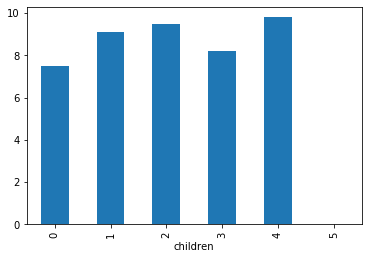

In [ ]:
dd['процент невозвратов'].plot(kind='bar')

### Вывод

Явной зависимости не наблюдается. Видим, что лучший показатель у тех, кто не имеет детей, однако перевес не велик. Поэтому можно сделать вывод, что наличие детей незначительно увеличивает риск не возврата кредита в срок.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
dd1['процент невозвратов'] = ((dd1['sum']/dd1['count'])*100).round(1)

dd1

,count,sum,процент невозвратов
family_status,,,
Не женат / не замужем,2813,274,9.7
в разводе,1195,85,7.1
вдовец / вдова,960,63,6.6
гражданский брак,4177,388,9.3
женат / замужем,12380,931,7.5


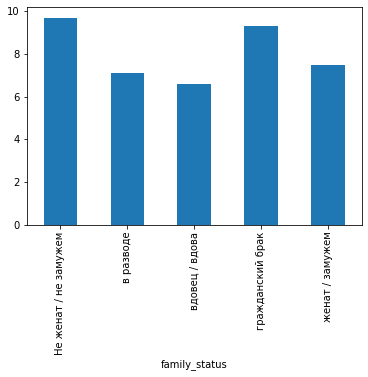

In [ ]:
dd1['процент невозвратов'].plot(kind='bar')

In [ ]:
ddwhat = df.groupby('family_status')['dob_years'].agg(['mean'])
ddwhat.round(1)

,mean
family_status,
Не женат / не замужем,38.4
в разводе,45.5
вдовец / вдова,56.5
гражданский брак,42.1
женат / замужем,43.6


### Вывод

Зависимость есть. В явных лидерах находятся группы "Вдовец/Вдова" и "В Разводе". Эти категории реже всего не возвращают кредиты в срок. Худшие же показатели у групп "Не женат / не замужем" и "Гражданский брак", они почти на 3% устают лидирующим группам. Причиной этому во многом может служить тот факт, что первые две группы более возрастные.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
dd2.index=['до 50к', '50-100к', '100-150к', '150-200к', '200к+']

dd2['процент невозвратов'] = ((dd2['sum']/dd2['count'])*100).round(1)

dd2


,count,sum,процент невозвратов
до 50к,372,23,6.2
50-100к,4091,331,8.1
100-150к,6117,526,8.6
150-200к,5370,473,8.8
200к+,5575,388,7.0


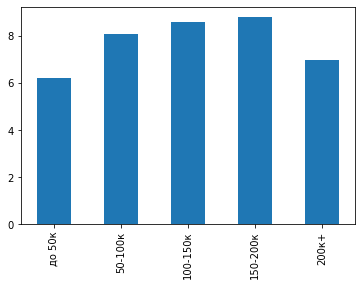

In [ ]:
dd2['процент невозвратов'].plot(kind='bar')

### Вывод

Да, прослеживается зависимость. И, как ни странно, но самые надежные, в плане своевременных возвратов - это клиенты с заработком сверх 200к в месяц и с заработком до 50к в месяц. 

- Как разные цели кредита влияют на его возврат в срок?

In [ ]:
dd3['процент невозвратов'] = ((dd3['sum']/dd3['count'])*100).round(1)

dd3


,count,sum,процент невозвратов
lemmas,,,
авто,4315,403,9.3
жилье и недвижимость,10840,782,7.2
образование,4022,370,9.2
свадьба,2348,186,7.9


### Вывод

Самые надежные заемщики в категории "Жилье и Недвижимость". Самые не надежные: "Авто" и "Образование". Вероятно, это можно объяснить тем, что "Авто" и "Образование" это более спонтанные траты, нежели "Жилье и Недвижимость".

### PIVOT TABLE для формирования сводных таблиц

In [ ]:
pivotwhynot = df.pivot_table(index = ["lemmas"], columns = 'family_status', values = 'debt', aggfunc='mean')

In [ ]:
pivotwhynot[pivotwhynot.select_dtypes(include=['number']).columns] *= 100

In [ ]:
pivotwhynot.round(1)

family_status,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
lemmas,,,,,
авто,12.9,7.5,9.2,11.8,8.3
жилье и недвижимость,8.1,7.0,5.2,9.2,6.9
образование,10.7,7.1,7.5,14.9,8.3
свадьба,NaN,NaN,NaN,7.9,NaN


In [ ]:
df.pivot_table(index = 'children', values = 'debt', aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,debt,debt,debt
children,,,
0,14149,1063,0.075129
1,4865,445,0.091470
2,2131,202,0.094791
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


### Вывод

<font color='green'>Посредством метода Pivot_table мы увидели еще несколько интересных закономерностей в разрезе "Семейное положение" к "Цель кредита":

- Чаще всего должниками по кредиту являются люди в гражданском браке, взявшие кредит на образование.
- Чуть менее часто, но все равно часто, должниками являются не женатые/не замужние люди, взявшие кредит на покупку автомобиля.

Самыми надежными же заемщиками являются:

- Вдовцы/вдовы, взяшие кредит на покупку жилья или недвижимости. Лишь в 5% случаях они попадают в разряд должников.
- Вторыми же по надежности являются женатые/замужние люди, так же взяшие кредит на покупку жилья или недвижимости. 

И важно сделать ремарку, что данные показатели могут быть не совсем точны, так как категория "Вдовы/Вдовцы" является самой малочисленной в рамках нашей таблицы, а в следствии разделения на подкатегории в соответствии с "Цель кредита" - их количество может стать совсем не репрезентативным. Но от этих данных вполне можно отталкиваться при построении гипотез, которые можно будет проверить уже на более объемных базах. </font>

### Итоговый вывод

Был проведен анализ базы данных, в рамках которого мы пришли к следующим выводам:

- Наличие детей незначительно влияет на возврат кредита в срок. Отсутствие детей - не значительно, но повышает вероятность возврата кредита в срок. Поэтому если вы - Банк, то лучше выдавать кредиты сторонникам чайлд-фри :)
- Семейное положение же оказывает более явное влияние на возврат кредитов в срок. Прошедшие через тяжкий опыт брака ("Вдовец/Вдова" и "В Разводе") - более надежные ребята и чаще возвращают кредиты в срок. 
- Заработок также влияет на возврат кредита в срок. И, как ни странно, но самые надежные, в плане своевременных возвратов - это клиенты с заработком сверх 200к в месяц и с заработком до 50к в месяц. 
- Цель кредита также оказывает существенное влияние на возвращаемость займа в срок. Самые надежные заемщики в категории "Жилье и Недвижимость". Самые не надежные: "Авто" и "Образование".

В итоге, если вы - Банк, и вам позарез нужно выдать кредит и вы не хотите рисковать, то выбирайте бездетных вдов/вдовцов с заработком от 200к в месяц, которые желают приобрести недвижимость. Не прогадаете.